In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
from scipy import stats
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# fuctions for compressibility of DHS
pi=3.14159265359
def log(x):
       
       return math.log (x, 2.718281828459)

def etazero(a):
       a = float(a)
       return (0.1763578244/(a))

def ksi(x):
       return ((math.pi/6.0)*x)

def gCS(x):
       return ((1.0-0.5*ksi(x))/(1.0-ksi(x))**3.0)

def Zhs(x):
       return ((1.0+ksi(x)+ksi(x)**2.0-ksi(x)**3.0)/(1.0-ksi(x))**3.0)
 

def Lambda(m,S):
       return (m**2.0/(S**3.0))

def etaEns(x):
       Vexcl=((2.0/3.0)*math.pi)
       return (0.1763578244*(1.016/gCS(x)+0.8*Vexcl*x
              +0.7760*Vexcl*Vexcl*x*x*gCS(x)))

In [3]:
def I1(m,S):
       return ((4.0/3.0)*Lambda(m,S)**2.0+(4.0/75.0)*Lambda(m,S)**4.0
               +(116.0/55125.0)*Lambda(m,S)**6.0)

def I2(m,S):
       return ((4.0*log(2.0)+2.0/3.0)*Lambda(m,S)**2.0-(20.0/9.0)*Lambda(m,S)**3.0+
               ((661727.0/9600.0)-(1468.0/15.0)*log(2.0))*Lambda(m,S)**4.0
               -0.1547*Lambda(m,S)**5.0+0.1116*Lambda(m,S)**6.0-0.0143*Lambda(m,S)**7.0+
                0.0105*Lambda(m,S)**8.0-0.0015*Lambda(m,S)**9.0+0.0007*Lambda(m,S)**10.0
               -0.000130*Lambda(m,S)**11.0+0.00004*Lambda(m,S)**12.0)
       
def I3(m,S):
       return (2.901720*Lambda(m,S)**2.0-7.0500*Lambda(m,S)**3.0+1.04490*Lambda(m,S)**4.0
               +9.48830*Lambda(m,S)**5.0-4.35900*Lambda(m,S)**6.0)

def I4(m,S):
       return (-49.14760*Lambda(m,S)**2.0+64.76730*Lambda(m,S)**3.0+11.07280*Lambda(m,S)**4.0-27.15310*Lambda(m,S)**5.0-
               3.9332*Lambda(m,S)**6.0+9.1977*Lambda(m,S)**7.0-1.2892*Lambda(m,S)**8.0)

In [4]:
def f(x,S,m):
       x = float(x)
       return (-log((1.0+I1(m,S)*ksi(x)+(1.0/2.0)*I2(m,S)*ksi(x)**2.0
               +(1.0/3.0)*I3(m,S)*ksi(x)**3.0+(1.0/4.0)*I4(m,S)*ksi(x)**4.00)))

def Zex(x,S,m):
       return (x*((f(x+0.00001,S,m)-f(x,S,m))/0.00001))

def Z(x,S,m):
       return  (Zex(x,S,m)+Zhs(x))

def U(x,S,m):
       return  ((1.0/2.0)*m*((f(x,S,m+0.0001)-f(x,S,m))/0.0001))

def g(x,S,m):
       return  (1.0/(4.0*ksi(x)))*(Z(x,S,m)-1.0-U(x,S,m))

def eta(x,S,m,a):
       Vexcl=((2.0/3.0)*math.pi)
       return  (etazero(a)*Vexcl*x*((1.016/(Z(x,S,m)-1.0-U(x,S,m)))+0.8+0.776*(Z(x,S,m)-1.0-U(x,S,m))))

In [5]:
def rescalefunction(x):
       return etaEns(x*6./pi)

In [6]:
#np.vectorize takes a python function (pyfunc) and returns a vectorized version of the function.
#The vectorized version of the function takes a sequence of objects or NumPy arrays as input and evaluates 
#the Python function over each element of the input sequence.
f = np.vectorize(f) 
Zex = np.vectorize(Zex) 
Z = np.vectorize(Z) 
eta = np.vectorize(eta) 
g = np.vectorize(g) 
U = np.vectorize(U) 

[[6.69474994e-03 6.38656699e-05]
 [6.38656699e-05 1.53607630e-05]]
[[7.44920933e-05 1.71324312e-05]
 [1.71324312e-05 1.22771918e-05]]
[[6.01861601e-07 3.84870313e-07]
 [3.84870313e-07 6.37057744e-07]]
[[1.37668552e-05 3.26637851e-06]
 [3.26637851e-06 3.34963452e-05]]


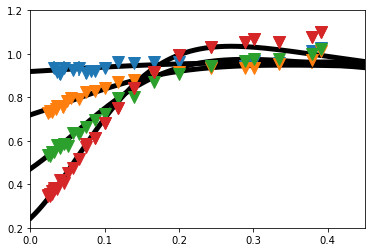

In [7]:
plt.xticks(np.arange(0.,0.45, 0.1))
plt.xlim((0.,0.45))
plt.ylim((0.2,1.2))


data1 = pd.read_table('./1.txt', skiprows=0, sep='\s+')
data2 = pd.read_table('./2.txt', skiprows=0, sep='\s+')
data3 = pd.read_table('./3.txt', skiprows=0, sep='\s+')
data4 = pd.read_table('./4.txt', skiprows=0, sep='\s+')

l1 = data1[['rho', 'eta','err_eta']]
l2 = data2[['rho', 'eta','err_eta']]
l3 = data3[['rho', 'eta','err_eta']]
l4 = data4[['rho', 'eta','err_eta']]

res1= data1['rho'].apply(lambda x: rescalefunction(x*pi/6.))
res2= data2['rho'].apply(lambda x: rescalefunction(x*pi/6.))
res3= data3['rho'].apply(lambda x: rescalefunction(x*pi/6.))
res4= data4['rho'].apply(lambda x: rescalefunction(x*pi/6.))

w1=l1[l1['rho']<0.6]
w2=l2[l2['rho']<0.6]
w3=l3[l3['rho']<0.6]
w4=l4[l4['rho']<0.7]


plt.errorbar( (data1.rho)*pi/6.0, (data1.eta/res1),(data1.err_eta/res1),fmt='v',label="$\lambda=1$",markersize=12)
plt.errorbar( (data2.rho)*pi/6.0, (data2.eta/res2),(data2.err_eta/res2),fmt='v',label="$\lambda=2$",markersize=12)
plt.errorbar( (data3.rho)*pi/6.0, (data3.eta/res3),(data3.err_eta/res3),fmt='v',label="$\lambda=3$",markersize=12)
plt.errorbar( (data4.rho)*pi/6.0, (data4.eta/res4),(data4.err_eta/res4),fmt='v',label="$\lambda=4$",markersize=12)
x = np.arange(0.0, 1.0, 0.001)


m1=1.0
m2=2.0
m3=3.0
m4=4.0

def ETA1(x,S,a):
       return  eta(x,S,m1**0.5,a)
def ETA2(x,S,a):
       return  eta(x,S,m2**0.5,a)
def ETA3(x,S,a):
       return  eta(x,S,m3**0.5,a)
def ETA4(x,S,a):
       return  eta(x,S,m4**0.5,a)

popt_1, pcov_1 = curve_fit(ETA1, w1.rho, w1.eta,sigma=w1.err_eta,bounds=[[0.90,0.1],[1.5,3.]])
print(pcov_1)
popt_2, pcov_2 = curve_fit(ETA2, w2.rho, w2.eta,sigma=w2.err_eta,bounds=[[0.90,0.1],[1.5,3.]])
print(pcov_2)
popt_3, pcov_3 = curve_fit(ETA3, w3.rho, w3.eta,sigma=w3.err_eta,bounds=[[0.90,0.1],[1.5,3.]])
print(pcov_3)
popt_4, pcov_4 = curve_fit(ETA4, w4.rho, w4.eta,sigma=w4.err_eta,bounds=[[0.90,0.1],[1.5,3.]])
print(pcov_4)



plt.plot(x, ETA1(x*6./pi, *popt_1)/etaEns(x*6./pi), 'k-',linewidth=5,label='Fits')
plt.plot(x, ETA2(x*6./pi, *popt_2)/etaEns(x*6./pi), 'k-',linewidth=5)
plt.plot(x, ETA3(x*6./pi, *popt_3)/etaEns(x*6./pi), 'k-',linewidth=5)
plt.plot(x, ETA4(x*6./pi, *popt_4)/etaEns(x*6./pi), 'k-',linewidth=5)